# Section 1: Data Source Citations
OpenFlights. Airports [Data set].  https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat​
OpenFlights. Airlines [Data set]. https://raw.githubusercontent.com/jpatokal/openflights/master/data/airlines.dat​
OpenFlights. Routes [Data set]. https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat​
OpenFlights. Planes [Data set]. https://raw.githubusercontent.com/jpatokal/openflights/master/data/planes.dat​
OpenFlights. Countries [Data set]. https://raw.githubusercontent.com/jpatokal/openflights/master/data/countries.dat

# Section 1: Set-Up/Things That Only Need to be Run Once

In [17]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data files
airlineRawData = pd.read_csv('../data/openFlightsRaw/airline.csv')
airportRawData = pd.read_csv('../data/openFlightsRaw/airports.csv')
countryRawData = pd.read_csv('../data/openFlightsRaw/countries.csv')
planeRawData = pd.read_csv('../data/openFlightsRaw/planes.csv')
routeRawData = pd.read_csv('../data/openFlightsRaw/routes.csv')

# Section 2: Evaluating Country Distribution of Data

Number of Unique Countries in the Airline Dataset

278

Number of Unique Countries in the Airports Dataset

237


<BarContainer object of 8 artists>

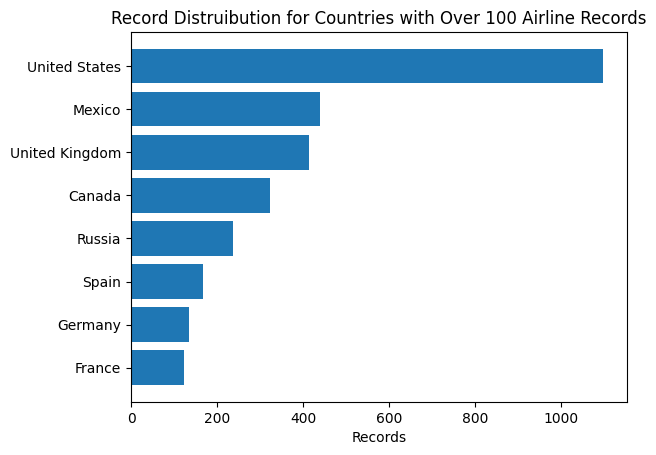

In [18]:
# Find out how many unique countries we have airport and airline data for.
print("Number of Unique Countries in the Airline Dataset\n")
print(len(airlineRawData["CTRY"].unique()))
print("\nNumber of Unique Countries in the Airports Dataset\n")
print(len(airportRawData["CTRY"].unique()))


# Get the count of how many airlines we have data for in each country
plotDataAirline = airlineRawData.groupby('CTRY').count().reset_index().sort_values(by='NAME', ascending= False)

# Save ranking data for summary section
summaryTableA = pd.DataFrame({"CTRY": [], "AIRLINE_RANK": []})
index = 0
rank = 10
while index != 10:
    summaryTableEntry = pd.DataFrame({"CTRY": [plotDataAirline.iloc[index, 0]], "AIRLINE_RANK": [rank]})
    summaryTableA = pd.concat([summaryTableA, summaryTableEntry])
    index += 1
    rank -= 1

# Filter out countries that have less data for graph readability.
plotDataAirline = plotDataAirline.loc[plotDataAirline['NAME'] > 100]
plotDataAirline = plotDataAirline.sort_values(by='NAME', ascending= True)

#Plot results
plt.title('Record Distruibution for Countries with Over 100 Airline Records')
plt.xlabel('Records')
plt.barh(plotDataAirline.CTRY, plotDataAirline.NAME)

<BarContainer object of 12 artists>

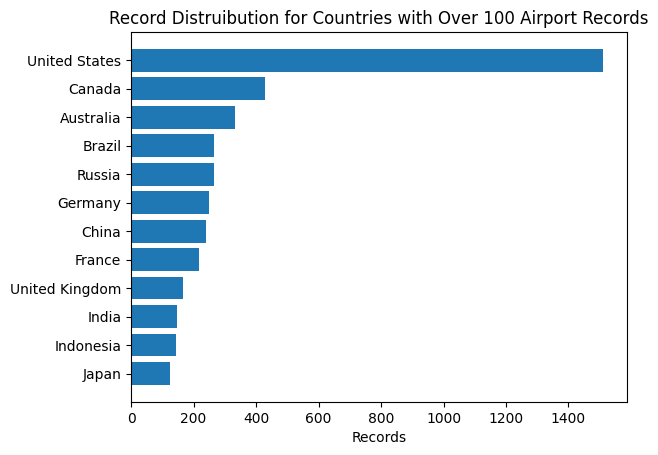

In [19]:
# Get the count of how many airports we have data for in each country
plotDataAirport = airportRawData.groupby('CTRY').count().reset_index().sort_values(by='NAME', ascending= False)

# Save ranking data for summary section
summaryTableB = pd.DataFrame({"CTRY": [], "AIRPT_RANK": []})
index = 0
rank = 10
while index != 10:
    summaryTableEntry = pd.DataFrame({"CTRY": [plotDataAirport.iloc[index, 0]], "AIRPT_RANK": [rank]})
    summaryTableB = pd.concat([summaryTableB, summaryTableEntry])
    index += 1
    rank -= 1

# Filter out countries that have less data for graph readability.
plotDataAirport = plotDataAirport.loc[plotDataAirport['NAME'] > 100]
plotDataAirport = plotDataAirport.sort_values(by='NAME', ascending= True)

# Plot results
plt.title('Record Distruibution for Countries with Over 100 Airport Records')
plt.xlabel('Records')
plt.barh(plotDataAirport.CTRY, plotDataAirport.NAME)

This is showing us that if we want to focus on a subset of countries to narrow our scope, that these countries will have the most variety in airline and airport data. We can also see that there are countries in both graphs, if we did need to scope our data down more, these would be good candidates to consider since they have the most data available between airports and aircraft. 

# Section 3: Investigate if there are Airports in Countries that Can Probably be Omitted for this Project

In [20]:
# Create list of Airlines that are in countries that don't appear in the countries dataset
outlierAirlines = pd.merge(airlineRawData.sort_values(by='CTRY'), countryRawData.sort_values(by='NAME'), how= 'left', left_on= 'CTRY', right_on= "NAME", indicator=True)
outlierAirlines = outlierAirlines.loc[outlierAirlines['_merge'] == 'left_only']

# Print out the counted infromation for airlines
print('Number of Unmatched Airlines')
print(outlierAirlines['AIRLINE_ID'].count())
print('\nList of Unmatched Countries from Airline Data')
print(outlierAirlines.groupby('CTRY').count().reset_index().CTRY)

# Create list of Airports that are in countries that don't appear in the countries dataset
outlierAirports = pd.merge(airportRawData.sort_values(by='CTRY'), countryRawData.sort_values(by='NAME'), how= 'left', left_on= 'CTRY', right_on= "NAME", indicator=True)
outlierAirports = outlierAirports.loc[outlierAirports['_merge'] == 'left_only']

# Print out the counted infromation for airports
print('\n---\n')
print('Number of Unmatched Airports from Airport Data')
print(outlierAirports['AIRPT_ID'].count())
print('\nList of Unmatched Countries')
print(outlierAirports.groupby('CTRY').count().reset_index().CTRY)


Number of Unmatched Airlines
234

List of Unmatched Countries from Airline Data
0      Boonville Stage Line
1                      S.A.
2                      ACOM
3               ACTIVE AERO
4                AEROCENTER
              ...          
83            UNIFORM OSCAR
84           UNited Kingdom
85                    VELES
86                 WATCHDOG
87                       \N
Name: CTRY, Length: 88, dtype: object

---

Number of Unmatched Airports from Airport Data
147

List of Unmatched Countries
0                               Brunei
1                                Burma
2                           Cape Verde
3                  Congo (Brazzaville)
4                     Congo (Kinshasa)
5                           East Timor
6                        Faroe Islands
7                           Kyrgyzstan
8                                Macau
9                           Micronesia
10                        Saint Helena
11               Saint Kitts and Nevis
12                  

Based on countries listed in the countries.csv there are a few airlines and airports that could be cleaned up/ignored since they most likely aren't in valid countries.

# Section 4: Join Route Data to Airports to Understand Route Locations

In [21]:
# Add country data to routes
srcAirportFormat = airportRawData.set_axis(["SRC_AIRPT_ID","SRC_NAME","SRC_CTY","SRC_CTRY","SRC_IATA","SRC_ICAO","SRC_LAT","SRC_LONG","SRC_ALT","SRC_TZ","SRC_DST","SRC_DBTZ","SRC_TYPE","SRC_SRC"], axis=1)
destnAirportFormat = airportRawData.set_axis(["DESTN_AIRPT_ID","DESTN_NAME","DESTN_CTY","DESTN_CTRY","DESTN_IATA","DESTN_ICAO","DESTN_LAT","DESTN_LONG","DESTN_ALT","DESTN_TZ","DESTN_DST","DESTN_DBTZ","DESTN_TYPE","DESTN_SRC"], axis=1)

# Merge data that matches the IATA code
routeCountryIATA = pd.merge(routeRawData, srcAirportFormat, how= 'left', left_on= 'SRC_AIRPT', right_on= "SRC_IATA")
routeCountryIATA = pd.merge(routeCountryIATA, destnAirportFormat, how= 'left', left_on= 'DESTN_AIRPT', right_on= "DESTN_IATA")
routeCountryIATA = routeCountryIATA.loc[routeCountryIATA['AIRLINE'].notna()]

# Merge data that matches the ICAO code
routeCountryICAO = pd.merge(routeRawData, srcAirportFormat, how= 'left', left_on= 'SRC_AIRPT', right_on= "SRC_ICAO")
routeCountryICAO = pd.merge(routeCountryICAO, destnAirportFormat, how= 'left', left_on= 'DESTN_AIRPT', right_on= "DESTN_ICAO")
routeCountryICAO = routeCountryICAO.loc[routeCountryICAO['AIRLINE'].notna()]

# Final merge to create one data set
routeLocation = pd.concat([routeCountryIATA, routeCountryICAO])

# Section 5: Display Country Distribution of Routes

<BarContainer object of 5 artists>

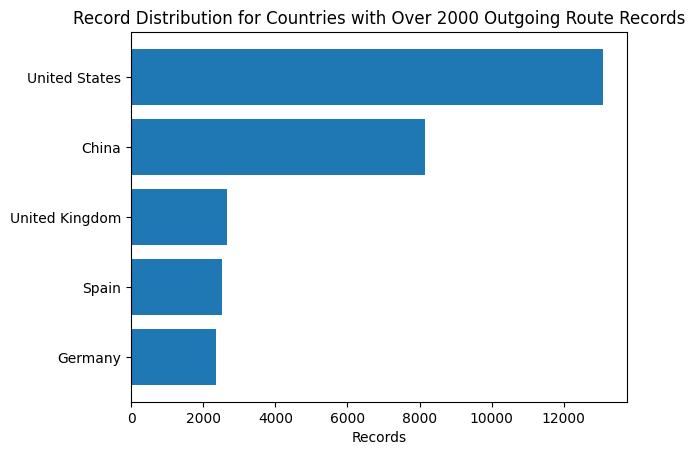

In [56]:
# Get the count of how many outgoing routes we have data for in each country
plotDataRouteLocationSRC = routeLocation.groupby('SRC_CTRY').count().reset_index().sort_values(by='AIRLINE', ascending= False)

# Save ranking data for summary section
summaryTableC = pd.DataFrame({"CTRY": [], "OG_ROUTE_RANK": []})
index = 0
rank = 10
while index != 10:
    summaryTableEntry = pd.DataFrame({"CTRY": [plotDataRouteLocationSRC.iloc[index, 0]], "OG_ROUTE_RANK": [rank]})
    summaryTableC = pd.concat([summaryTableC, summaryTableEntry])
    index += 1
    rank -= 1

EqualOrMore = pd.DataFrame({"RESULT": ["Equal to or More Than 100 Records"], "COUNT": [len(plotDataRouteLocationSRC.loc[plotDataRouteLocationSRC['AIRLINE'] >= 100])]})
Less = pd.DataFrame({"RESULT": ["Less Than 100 Records"], "COUNT": [len(plotDataRouteLocationSRC.loc[plotDataRouteLocationSRC['AIRLINE'] < 100])]})

plotOfCountries = pd.concat([EqualOrMore, Less])

# Filter out countries that have less data for graph readability.
plotDataRouteLocationSRC = plotDataRouteLocationSRC.loc[plotDataRouteLocationSRC['AIRLINE'] > 2000]
plotDataRouteLocationSRC = plotDataRouteLocationSRC.sort_values(by='AIRLINE', ascending= True)

# Plot results
plt.title('Record Distribution for Countries with Over 2000 Outgoing Route Records')
plt.xlabel('Records')
plt.barh(plotDataRouteLocationSRC.SRC_CTRY, plotDataRouteLocationSRC.AIRLINE)


([<matplotlib.patches.Wedge at 0x18a3c26a150>,
 [Text(0.4544148966188973, 1.0017520160852371, 'Equal to or More Than 100 Records'),
  Text(-0.45441445078846776, -1.0017522183227825, 'Less Than 100 Records')],
 [Text(0.24786267088303485, 0.5464101905919474, '36.4%'),
  Text(-0.24786242770280056, -0.5464103009033358, '63.6%')])

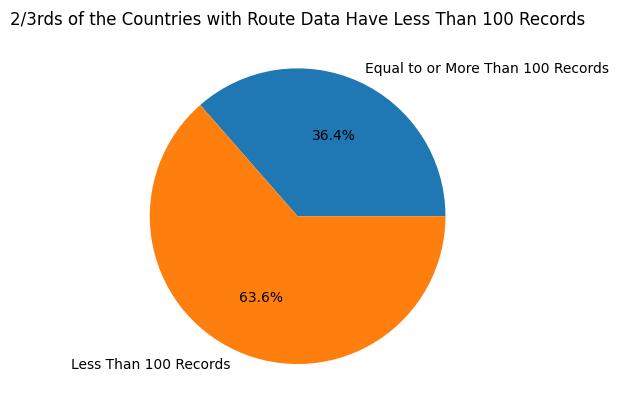

In [57]:
# Graph of how many countries have little data.
plt.title('2/3rds of the Countries with Route Data Have Less Than 100 Records')
plt.pie(plotOfCountries['COUNT'], labels=plotOfCountries['RESULT'], autopct='%1.1f%%')


<BarContainer object of 14 artists>

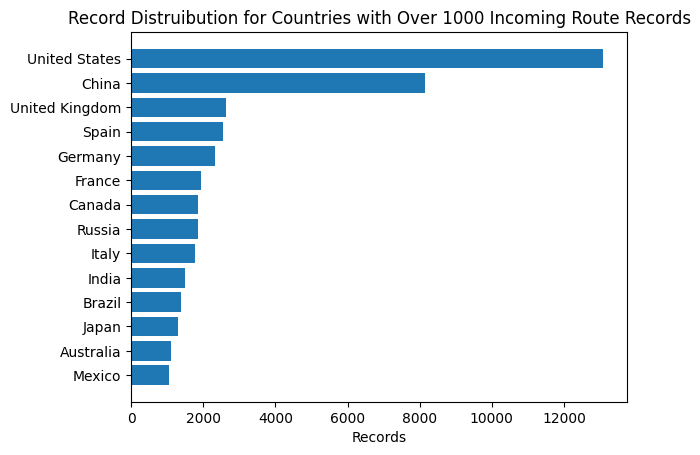

In [30]:
# Get the count of how many incoming routes we have data for in each country
plotDataRouteLocationDESTN = routeLocation.groupby('DESTN_CTRY').count().reset_index().sort_values(by='AIRLINE', ascending= False)

# Save ranking data for summary section
summaryTableD = pd.DataFrame({"CTRY": [], "IN_ROUTE_RANK": []})
index = 0
rank = 10
while index != 10:
    summaryTableEntry = pd.DataFrame({"CTRY": [plotDataRouteLocationDESTN.iloc[index, 0]], "IN_ROUTE_RANK": [rank]})
    summaryTableD = pd.concat([summaryTableD, summaryTableEntry])
    index += 1
    rank -= 1

# Filter out countries that have less data for graph readability.
plotDataRouteLocationDESTN = plotDataRouteLocationDESTN.loc[plotDataRouteLocationDESTN['AIRLINE'] > 1000]
plotDataRouteLocationDESTN = plotDataRouteLocationDESTN.sort_values(by='AIRLINE', ascending= True)

# Plot results
plt.title('Record Distruibution for Countries with Over 1000 Incoming Route Records')
plt.xlabel('Records')
plt.barh(plotDataRouteLocationDESTN.DESTN_CTRY, plotDataRouteLocationDESTN.AIRLINE)

With this, it doesn't seem like there is much difference in numbers of country distribution between outgoing and incoming routes. Just to show that there is in fact a difference though, the following plot is the two above on top of each other to show the blue sliver of different numbers.

<BarContainer object of 14 artists>

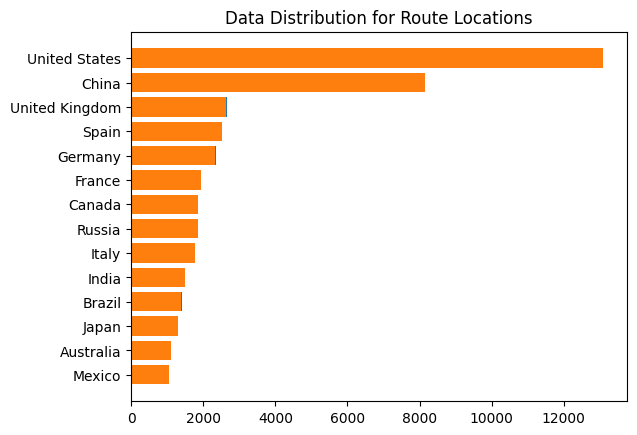

In [24]:
# Plot the two charts on top of each other
plt.title('Data Distribution for Route Locations')
plt.barh(plotDataRouteLocationSRC.SRC_CTRY, plotDataRouteLocationSRC.AIRLINE)
plt.barh(plotDataRouteLocationDESTN.DESTN_CTRY, plotDataRouteLocationDESTN.AIRLINE)

# Section 6: Finding Which Plane Types Have the Most Route Data

<BarContainer object of 17 artists>

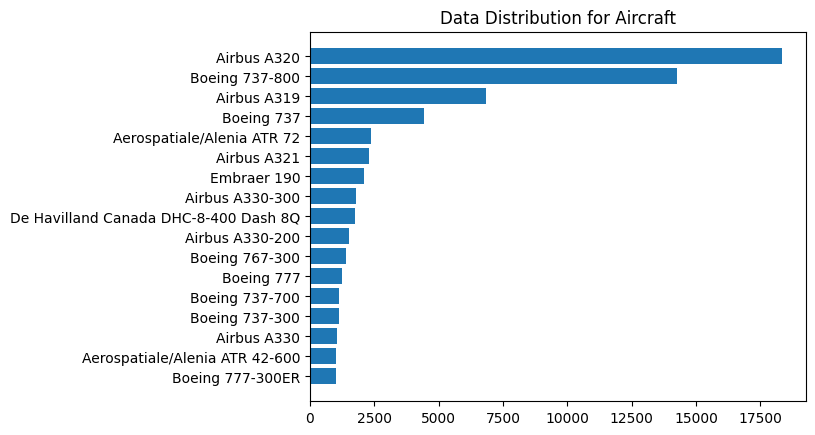

In [25]:
# Add plane data to routes
planeRouteLocation = pd.merge(routeLocation, planeRawData, how= 'left', left_on= 'EQPT', right_on= "IATA")

# Group by for plotting
plotPlaneRouteLocation = planeRouteLocation.groupby('NAME').count().reset_index().sort_values(by='AIRLINE')

# Filter out countries that have less data for graph readability.
plotPlaneRouteLocation = plotPlaneRouteLocation.loc[plotPlaneRouteLocation['AIRLINE'] > 1000]

# Plot results
plt.title('Record Distruibution for Countries with Over 1000 Incoming Route Records')
plt.xlabel('Records') 
plt.barh(plotPlaneRouteLocation.NAME, plotPlaneRouteLocation.AIRLINE)

# Section 7: Finding Which Countries have Routes Using the Top 4 Aircraft Types

<BarContainer object of 15 artists>

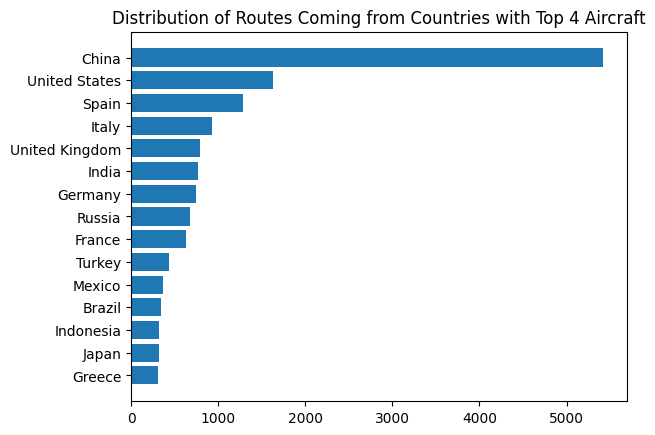

In [26]:
# Filter out everything but routes that are flown by one of the top four aircraft from above.
planeRouteLocation_top4 = planeRouteLocation.loc[(planeRouteLocation['NAME'] == "Airbus A320") | (planeRouteLocation['NAME'] == "Boeing 737-800") | (planeRouteLocation['NAME'] == "Airbus A319") | (planeRouteLocation['NAME'] == "Boeing 737")]

# Group by for plotting
plotPlaneRouteLocation_top4 = planeRouteLocation_top4.groupby('SRC_CTRY').count().reset_index().sort_values(by='AIRLINE', ascending= False)

# Save ranking data for summary section
summaryTableE = pd.DataFrame({"CTRY": [], "AIRCRFT_RANK": []})
index = 0
rank = 10
while index != 10:
    summaryTableEntry = pd.DataFrame({"CTRY": [plotPlaneRouteLocation_top4.iloc[index, 0]], "AIRCRFT_RANK": [rank]})
    summaryTableE = pd.concat([summaryTableE, summaryTableEntry])
    index += 1
    rank -= 1

# Filter out countries that have less data for graph readability.
plotPlaneRouteLocation_top4 = plotPlaneRouteLocation_top4.loc[plotPlaneRouteLocation_top4['AIRLINE'] > 300]
plotPlaneRouteLocation_top4= plotPlaneRouteLocation_top4.sort_values(by='AIRLINE', ascending= True)

# Plot results
plt.title('Distribution of Routes Coming from Countries with Top 4 Aircraft')
plt.barh(plotPlaneRouteLocation_top4.SRC_CTRY, plotPlaneRouteLocation_top4.AIRLINE)

Because the data was so similar between outgoing and incoming routes, as explored earlier, I feel that it is safe to omit writing code for the other graph.

# Section 8: Finding Which Countries have Routes with at Least One Stop

<BarContainer object of 5 artists>

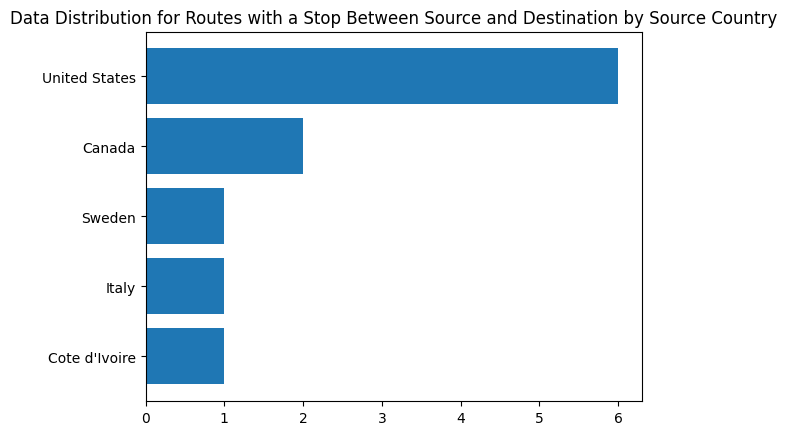

In [27]:
planeRouteLocation_Stops = planeRouteLocation.loc[planeRouteLocation['STOPS'] > 0 & planeRouteLocation['STOPS'].notna()]

# Group by for plotting
planeRouteLocation_Stops = planeRouteLocation_Stops.groupby('SRC_CTRY').count().reset_index().sort_values(by='AIRLINE')

# Plot results
plt.title('Data Distribution for Routes with a Stop Between Source and Destination by Source Country')
plt.barh(planeRouteLocation_Stops.SRC_CTRY, planeRouteLocation_Stops.AIRLINE)

<BarContainer object of 5 artists>

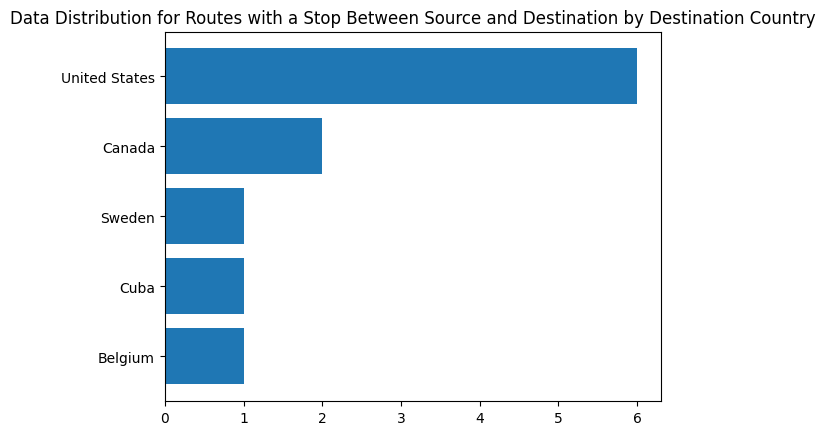

In [28]:
planeRouteLocation_Stops = planeRouteLocation.loc[planeRouteLocation['STOPS'] > 0 & planeRouteLocation['STOPS'].notna()]

# Group by for plotting
planeRouteLocation_Stops = planeRouteLocation_Stops.groupby('DESTN_CTRY').count().reset_index().sort_values(by='AIRLINE')

# Plot results
plt.title('Data Distribution for Routes with a Stop Between Source and Destination by Destination Country')
plt.barh(planeRouteLocation_Stops.DESTN_CTRY, planeRouteLocation_Stops.AIRLINE)

This is showing that if we want to incorporate stop quantities within our project, we will have to make more data for this case, so I am going to not further analyize this thread.

# Section 9: Summary

<BarContainer object of 14 artists>

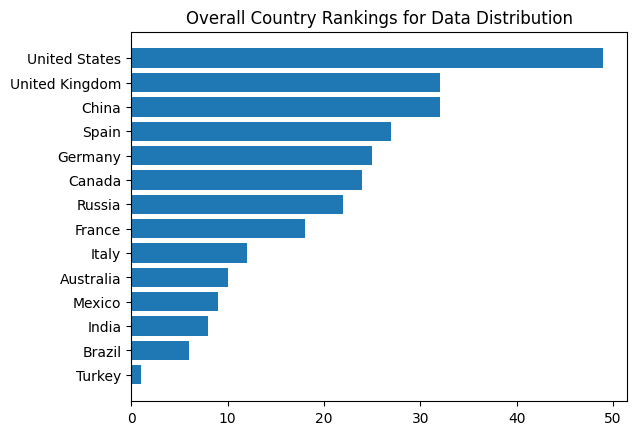

In [29]:
countryRankSummary = pd.merge(summaryTableA, summaryTableB, how= 'outer', left_on= 'CTRY', right_on= "CTRY")
countryRankSummary = pd.merge(countryRankSummary, summaryTableC, how= 'outer', left_on= 'CTRY', right_on= "CTRY")
countryRankSummary = pd.merge(countryRankSummary, summaryTableD, how= 'outer', left_on= 'CTRY', right_on= "CTRY")
countryRankSummary = pd.merge(countryRankSummary, summaryTableE, how= 'outer', left_on= 'CTRY', right_on= "CTRY")

countryRankSummary.fillna(0, inplace=True)

rank_columns = [col for col in countryRankSummary.columns if col != 'CTRY']

countryRankSummary["TOTAL_RANK"] = countryRankSummary[rank_columns].sum(axis=1)

countryRankSummary = countryRankSummary.sort_values(by='TOTAL_RANK')

# Plot results
plt.title('Overall Country Rankings for Record Count')
plt.barh(countryRankSummary.CTRY, countryRankSummary.TOTAL_RANK)

Within each category explored above, I took the top 10 countries from each category and assigned them a rank in each category based on where they ranked. I then summed them all together to determine which countries have more robust data. With this information, we could be able to narrow dowwn on what countries we want to use in our data scenario that would require us to have to create less variety of data than other countries.